Cleaning titles

In [4]:
import pandas as pd

df = pd.read_csv('used_cars.csv')
print('Before:', df.columns.tolist())
df.columns = df.columns.str.lower().str.replace(' ', '_')
print('After:', df.columns.tolist())

df.head()

Before: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
After: ['make', 'model', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
print('Text columns:', strings)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

Text columns: ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


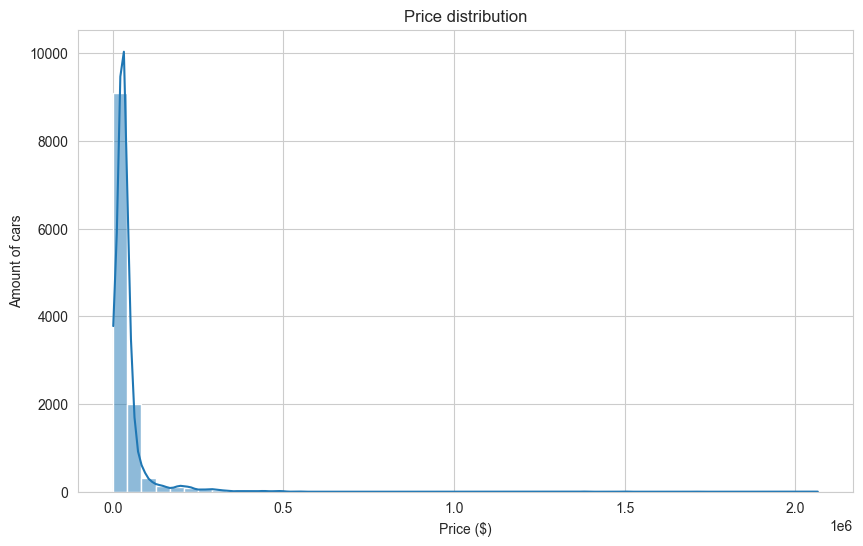

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(df.msrp, bins=50, kde=True)

plt.title("Price distribution")
plt.xlabel("Price ($)")
plt.ylabel("Amount of cars")
plt.show()

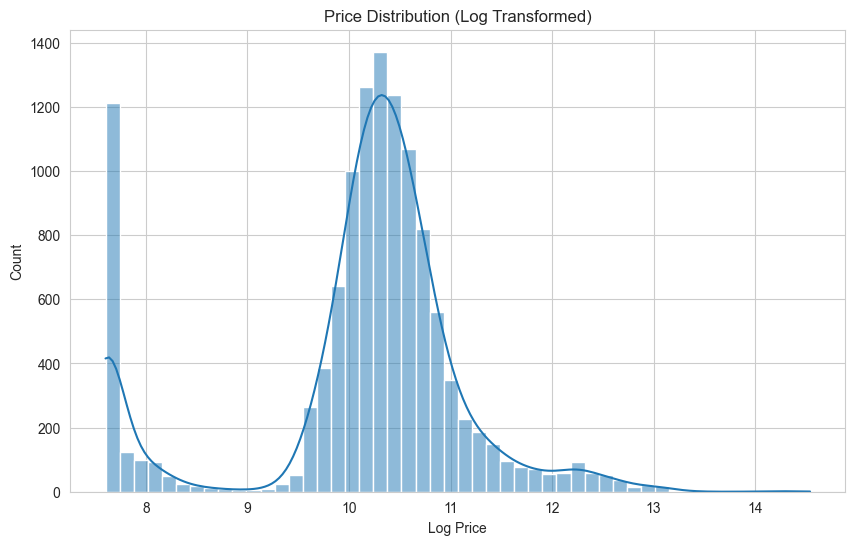

Original Price example: 46135
Log Price example: 10.739348835295248


In [7]:
import numpy as np

# 1. Apply log transformation to the price
# We use np.log1p (log(1 + x)) to avoid errors if price is 0
log_price = np.log1p(df.msrp)

# 2. Plot the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_price, bins=50, kde=True)

plt.title("Price Distribution (Log Transformed)")
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.show()

# Optional: Check how it looks
print("Original Price example:", df.msrp.iloc[0])
print("Log Price example:", log_price.iloc[0])

In [8]:
from sklearn.model_selection import train_test_split

n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - (n_val + n_test)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val : ]].copy()
print(f"Train: {len(df_train)}")
print(f"Validation: {len(df_val)}")
print(f"Test: {len(df_test)}")

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Train: 7150
Validation: 2382
Test: 2382


In [9]:
df_train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        2
engine_hp              52
engine_cylinders       16
transmission_type       0
driven_wheels           0
number_of_doors         4
market_category      2245
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [10]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

print(df_train.isnull().sum())

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64


In [11]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

print(f"Size of matrix X_train: {X_train.shape}")

Size of matrix X_train: (7150, 1043)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"Validation RMSE: {rmse:.4f}")

print("\nPredicted (Log) vs Real (Log):")
print(np.round(y_pred[:5], 2))
print(np.round(y_val[:5], 2))

Validation RMSE: 0.1553

Predicted (Log) vs Real (Log):
[10.49 10.68 10.    9.97 10.41]
[10.36 10.75 10.09  9.99 10.42]


In [24]:
# Let's try different depth limits
depths = [1, 2, 3, 4, 5, 7, 10, 13, 15, 20, 25, 35, None]

print("Depth | Train RMSE | Val RMSE")
print("-" * 30)

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_pred_train = dt.predict(X_train)
    y_pred_val = dt.predict(X_val)

    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_val = root_mean_squared_error(y_val, y_pred_val)

    print(f"{depth} | {rmse_train:.4f} | {rmse_val:.4f}")

Depth | Train RMSE | Val RMSE
------------------------------
1 | 0.5624 | 0.5643
2 | 0.3949 | 0.4137
3 | 0.2953 | 0.3105
4 | 0.2546 | 0.2734
5 | 0.2227 | 0.2517
7 | 0.1756 | 0.2111
10 | 0.1247 | 0.1761
13 | 0.0928 | 0.1635
15 | 0.0792 | 0.1583
20 | 0.0606 | 0.1544
25 | 0.0543 | 0.1552
35 | 0.0516 | 0.1570
None | 0.0515 | 0.1553


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                          max_depth=20,
                          random_state=42,
                          n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_val = rf.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
print(f"Random Forest RMSE: {rmse_val:.4f}")

Random Forest RMSE: 0.1460


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15, 20, 25],
    'n_estimators': [60, 100, 150, 200],
    'min_samples_leaf': [1, 5]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("The best params:", grid_search.best_params_)
print("The best result:", grid_search.best_score_)

best_model = grid_search.best_estimator_

The best params: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
The best result: -0.11710964108236703


In [28]:
df_test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(df_test_dicts)

y_pred_test = best_model.predict(X_test)

rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f"Final Test RMSE: {rmse_test:.4f}")

Final Test RMSE: 0.1125


In [29]:
import pickle

output_file = 'model_C=1.0.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, best_model), f_out)